In [1]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard
import matplotlib
import numpy as np
import os
from PIL import Image
from keras.optimizers import SGD
import cv2
from keras import regularizers

Using TensorFlow backend.


In [2]:
x_train = []
y_train = []
x_test = []
y_test = []
batch_size = 50
epochs = 30

In [3]:
for filename in os.listdir(os.getcwd()+'/training/'):
    #x = Image.open(os.getcwd()+'/training/'+filename)
    x = cv2.imread(os.getcwd()+'/training/'+filename,cv2.IMREAD_GRAYSCALE)
    x = cv2.resize(x, (64,64))
    x_train.append(np.array(x))
    if "cat" in filename:
        y_train.append(1)
    elif "dog" in filename:
        y_train.append(0)
        
for filename in os.listdir(os.getcwd()+'/testing/'):
    #x = Image.open(os.getcwd()+'/testing/'+filename)
    x = cv2.imread(os.getcwd()+'/testing/'+filename,cv2.IMREAD_GRAYSCALE)
    x = cv2.resize(x, (64,64))
    x_test.append(np.array(x))
    if "cat" in filename:
        y_test.append(1)
    elif "dog" in filename:
        y_test.append(0)
        
print("Done")

Done


In [4]:
x_train = np.array(x_train).astype('float32')
x_test = np.array(x_test).astype('float32')
x_train /= 255
x_test /= 255


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 12)        120       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 10)        1090      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 10)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 4)         364       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 5)         85        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 59, 59, 5)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 59, 59, 5)         230       
__________

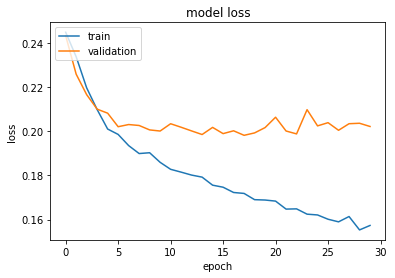

Test loss: 0.2022169417142868
Test accuracy: 0.686875


In [5]:
model = Sequential()
model.add(Conv2D(kernel_size=(3,3),filters=12,input_shape=(64, 64, 1),activation="relu",padding="valid"))
model.add(Conv2D(kernel_size=(3,3),filters=10,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
model.add(Conv2D(kernel_size=(3,3),filters=4,activation="relu",padding="same"))
model.add(Conv2D(kernel_size=(2,2),filters=5,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(1,1)))
model.add(Conv2D(kernel_size=(3,3),filters=5,activation="relu",padding="same"))
model.add(Flatten())
model.add(Dropout(0.55))
model.add(Dense(100,activation="sigmoid"))
model.add(Dense(1,activation='sigmoid'))
model.summary()

model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adam(lr=0.0003),
              metrics=['accuracy'])

x_train = x_train.reshape((x_train.shape)[0],(x_train.shape)[1],(x_train.shape)[2],1)
x_test = x_test.reshape((x_test.shape)[0],(x_test.shape)[1],(x_test.shape)[2],1)

X = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

plt.plot(X.history['loss'])
plt.plot(X.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])